# Background Removal Using Scikit-Image

Here, we will perform Background Removal using scikit-image. This will help us compare to the state-of-the-art U2Net model as implemented before

In [1]:
#Importing the Necessary Libraries
import os
from skimage import io as skio
from skimage import filters
from skimage import morphology
from skimage.segmentation import watershed
import matplotlib.pyplot as plt
import numpy as np
import requests
from io import BytesIO
from PIL import Image
from scipy import ndimage as ndi
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
print('Imports Done!')

Imports Done!


In [2]:
#Now we will make the required directories for the Images
os.makedirs('original',exist_ok=True)
os.makedirs('final',exist_ok=True)

In [3]:
#Get the Image from the Internet and store the name
img_url = 'https://wallpapers.com/images/hd/celebrity-baby-pictures-1484-x-990-rxgmbzmesi1l3x4d.jpg'
img_name = img_url.split('/')[-1]
img_name

'celebrity-baby-pictures-1484-x-990-rxgmbzmesi1l3x4d.jpg'

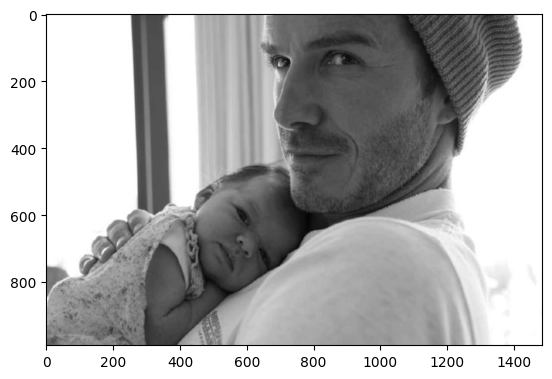

In [4]:
#Use the Image method to open the Image after requesting through the URL and save it
img = skio.imread(img_url)
original_pic = '/content/original/'+img_name
plt.imshow(img)

In [5]:
print(f"Shape of the Image: {img.shape}")

Shape of the Image: (990, 1484, 3)


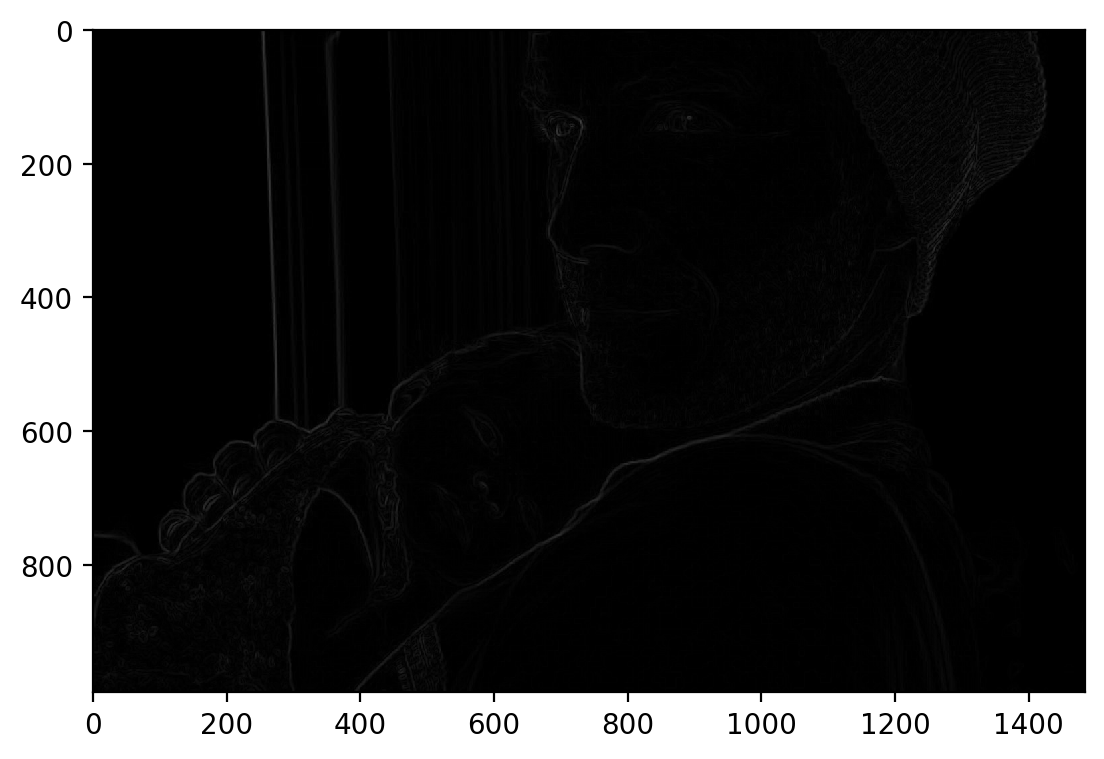

In [6]:
#Detect the Edges of the given Image
sobel = filters.sobel(img)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['figure.dpi'] = 200
plt.imshow(sobel)

/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:348: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  return func(*args, **kwargs)


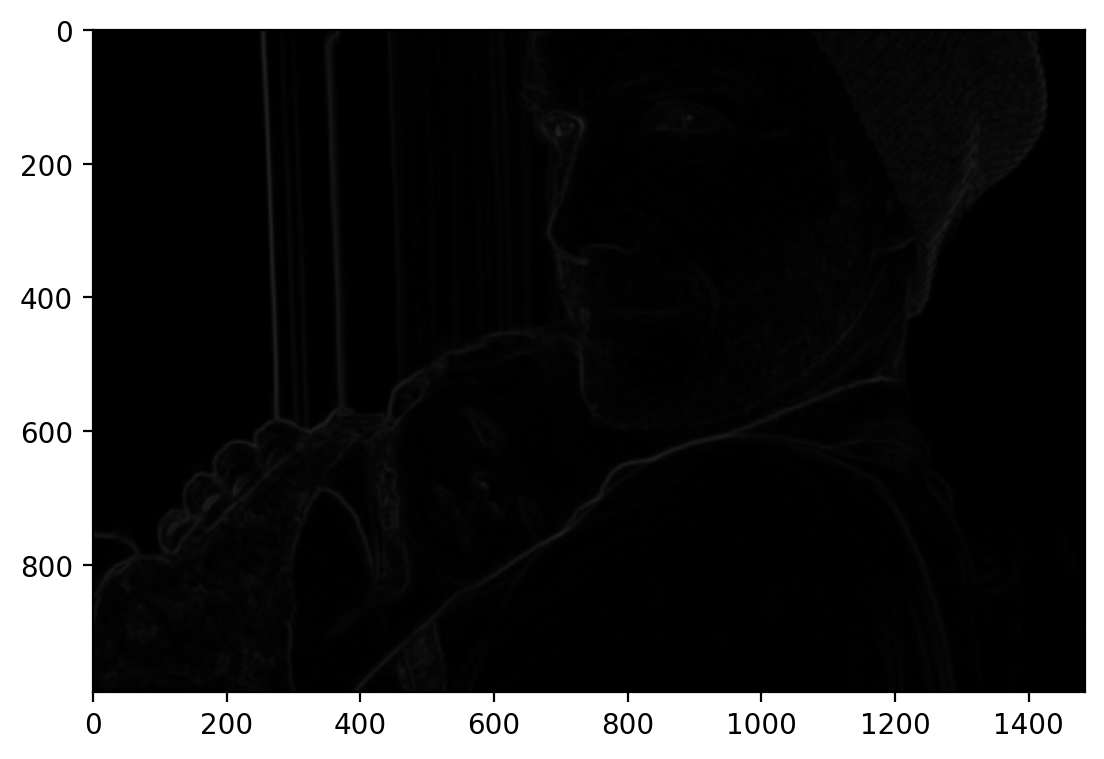

In [7]:
blurred = filters.gaussian(sobel, sigma=2.0)
plt.imshow(blurred)

In [8]:
#We need to assign classes to the foreground as well as the background
light_spots = np.array((img > 240).nonzero()).T
light_spots.shape

(1219296, 3)

Text(0.5, 1.0, 'light spots in image')

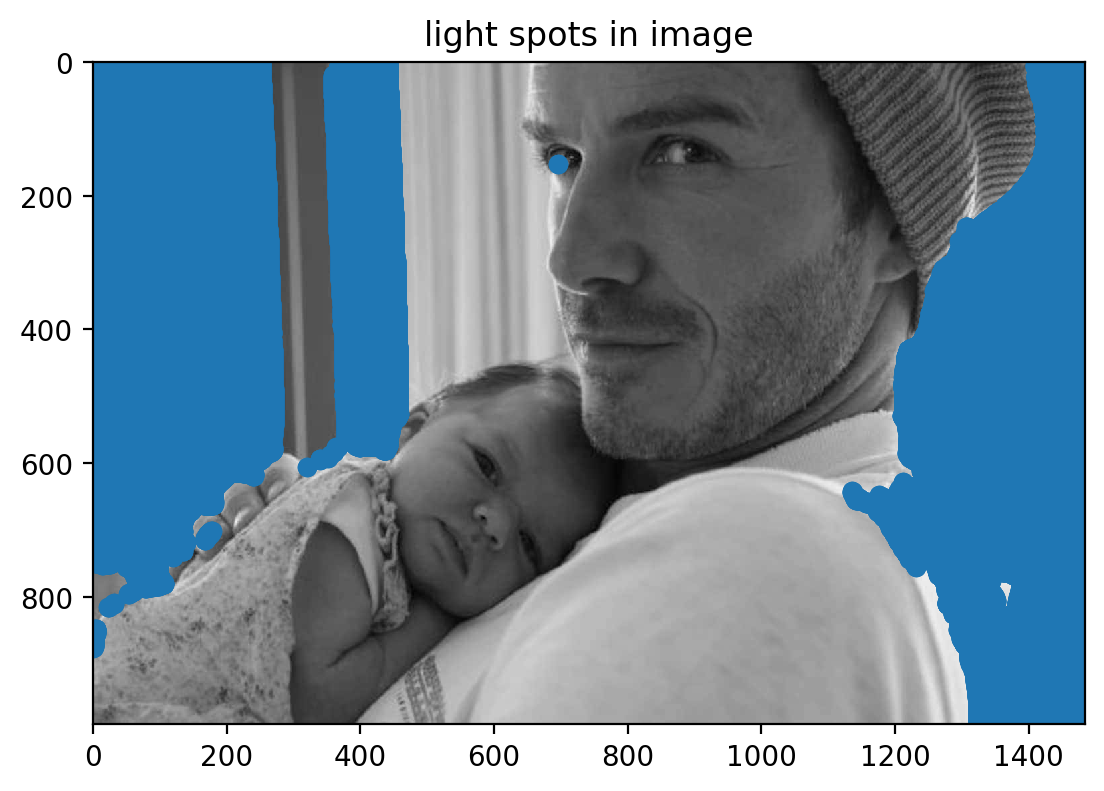

In [9]:
plt.plot(light_spots[:, 1], light_spots[:, 0], 'o')
plt.imshow(img)
plt.title('light spots in image')

In [10]:
dark_spots = np.array((img < 100).nonzero()).T
dark_spots.shape

(1424844, 3)

Text(0.5, 1.0, 'dark spots in image')

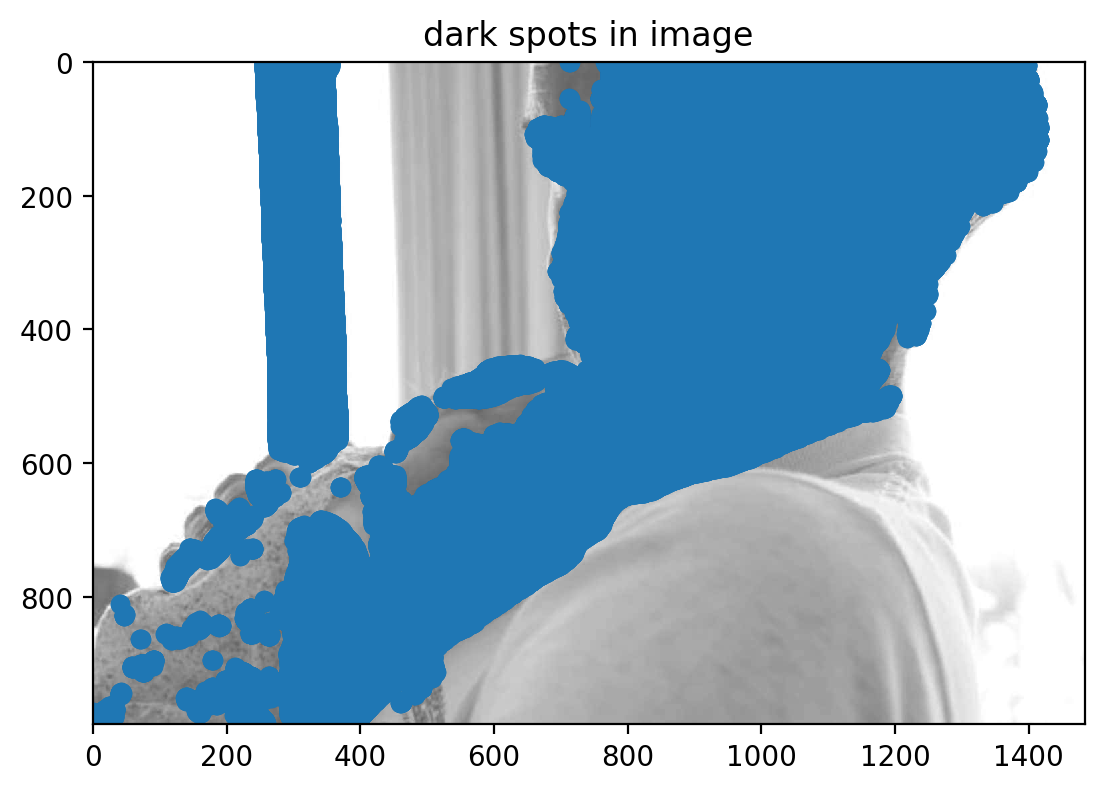

In [11]:
plt.plot(dark_spots[:, 1], dark_spots[:, 0], 'o')
plt.imshow(img)
plt.title('dark spots in image')

In [12]:
bool_mask = np.zeros(img.shape, dtype=np.bool)
bool_mask[tuple(light_spots.T)] = True
bool_mask[tuple(dark_spots.T)] = True
seed_mask, num_seeds = ndi.label(bool_mask)
num_seeds

<ipython-input-12-33898032a49f>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  bool_mask = np.zeros(img.shape, dtype=np.bool)


260

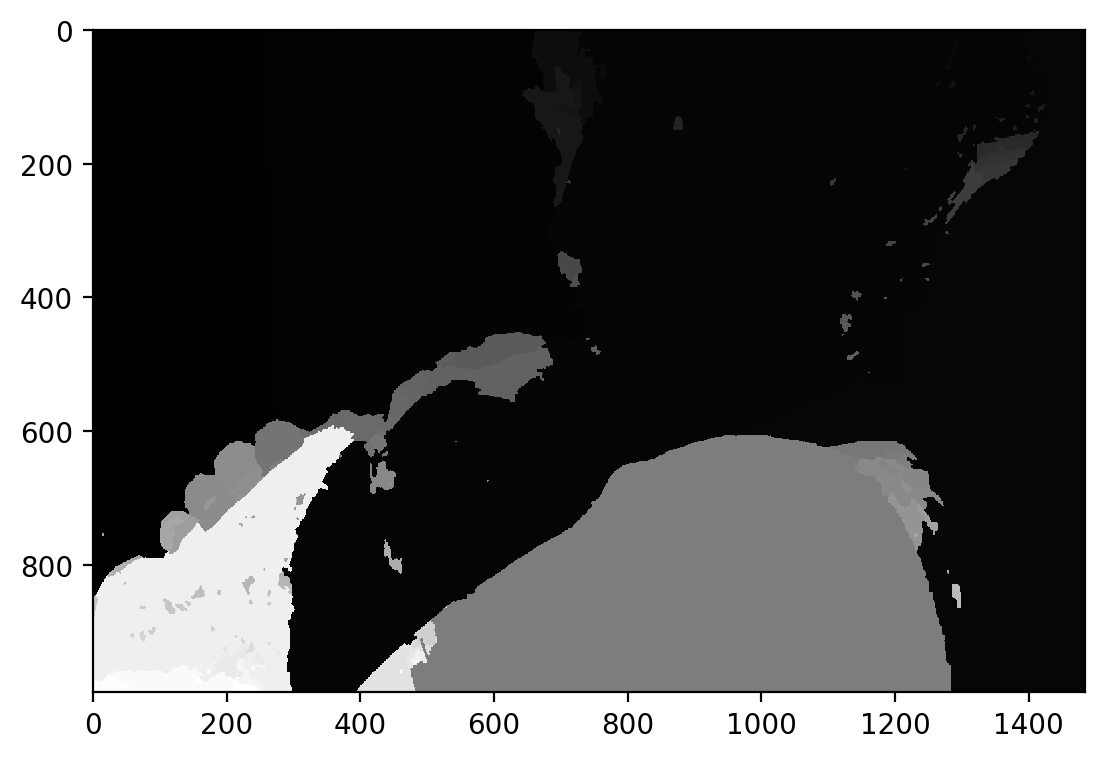

In [13]:
ws = watershed(sobel, seed_mask)
plt.imshow(ws)

In [14]:
background = max(set(ws.ravel()), key=lambda g: np.sum(ws == g))
background

5

In [15]:
background_mask = (ws < background)
print(background_mask.shape)

(990, 1484, 3)


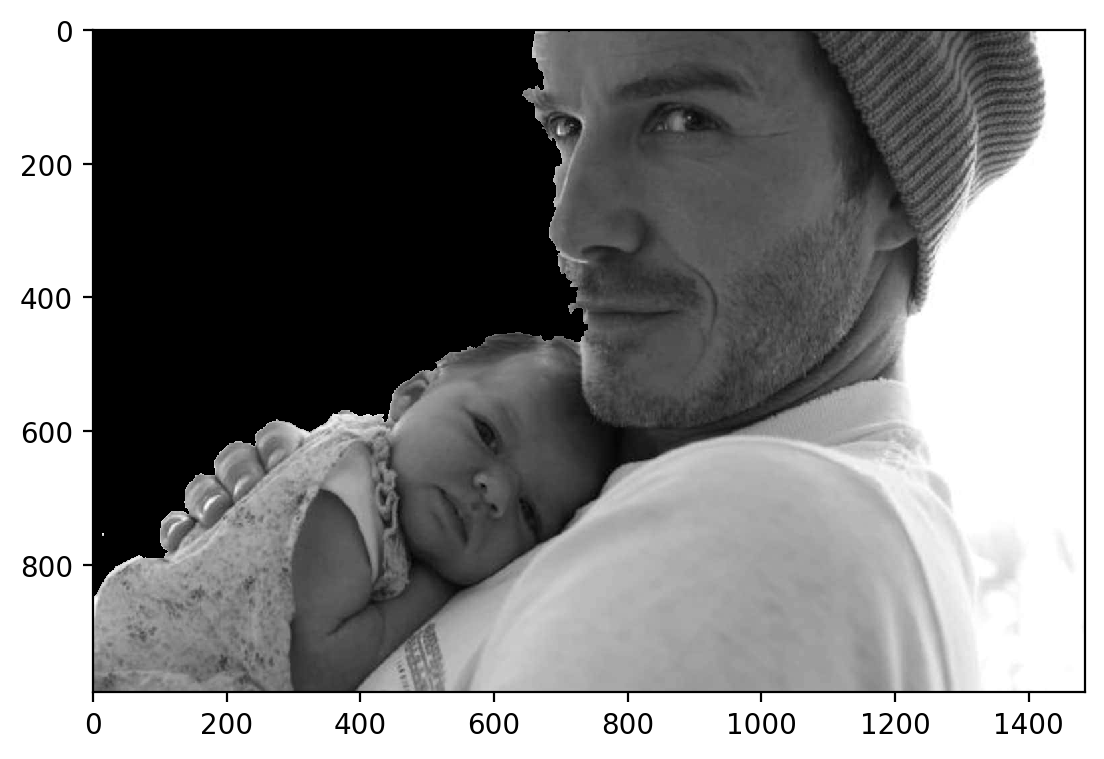

In [16]:
cleaned = img * ~background_mask
plt.imshow(cleaned)

Therefore, we can see that the Background is removed only partially for the given scenario, which is not as effective as the U2Net Model implementation